In [1]:
import numpy as np
from sklearn.linear_model import Lasso
import pylab as plt

# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement based on the Ridge regression example, the Lasso regression.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

### I performed cross-validation using one-out method. I calculate mean squared error. AS we can see on the plot, there is a minimum for alpha = ca. 0.02

In [2]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.array(np.asmatrix(np.c_[np.ones((15,1)),x])) # matrix is deprecated!!!!!!!!!!!!!!!

I = np.identity(2)
alpha_list = np.linspace(0,.1,1000) #[0.01,0.1, 1] # change here
results = [0]*len(alpha_list)

for no, alpha in enumerate(alpha_list):
    residuals = 0
    for num in range(len(x)):
        train_x = x[np.arange(len(x)) != num]
        train_y = y[np.arange(len(y)) != num]
        test_x = x[num]
        test_y = y[num][0]        
        w = np.linalg.inv(train_x.T@train_x + alpha * I)@train_x.T@train_y
        w = w.ravel()
        w = w.flatten()
        predict_y = w@test_x
        residual_single = (predict_y - test_y)**2 #+ alpha*(w@w.T)#
        residuals += residual_single/len(x)
    results[no] = residuals

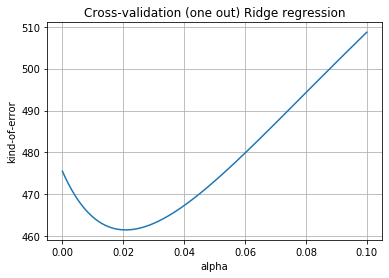

In [3]:
plt.plot(alpha_list, results)
plt.grid()
plt.title('Cross-validation (one out) Ridge regression')
plt.xlabel('alpha')
plt.ylabel('kind-of-error');

## 2. Implement based on the Ridge regression example, the Lasso regression.

You need only update the compare the results with the sklearn results. You should get
[1.61776499, -180.8579086].

In [31]:
x0 = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.array(np.asmatrix(np.c_[np.ones((15,1)),x0])) #matrix is deprecated!!!!!!!!!!!!!!!!!

In [32]:
I = np.identity(2)
alpha = 0.1 
nn=len(x)
s = np.sum(x**2,axis=0)

# I use equation from https://en.wikipedia.org/wiki/Lasso_(statistics). Another methods uses some kind of minimization.
w_ols = np.array(np.linalg.inv(x.T@x)@x.T@y)
rr = np.where(1-nn*alpha/np.abs(w_ols).flatten()/s > 0, 1-nn*alpha/np.abs(w_ols).flatten()/s, 0 ) 
w = w_ols.flatten()*rr

In [33]:
w

array([-180.82401772,    1.61813924])

In [34]:
clf = Lasso(alpha=0.1)

In [35]:
clf.fit(x0,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Results:

In [36]:
w

array([-180.82401772,    1.61813924])

In [37]:
clf.coef_

array([1.61776499])

In [11]:
clf.intercept_

array([-180.8579086])

In [12]:
print('Różnice')
w - np.array([clf.intercept_[0],clf.coef_[0]])

Różnice


array([0.03389088, 0.00037425])

My results from sklearn are the same as in the exercise text, but are different than Lasso regression results from scratch and wiki (but, still, they are similar)

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

### To be honest, I do not know how to improve code from exercise. I know that we should maximize the distance between groups and minimize the variance within groups, but I am not sure how to generalize difference between means and how to calculated cutoffs. Below you can find some tries in which I calculate covariance matrices, differences of means and cutoffs.

In [83]:
#code from exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df['sepal width (cm)'].values # change here
y = iris_df['sepal length (cm)'].values # change here

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b

In [85]:
# for two groups we minimize (mu0 - mu1)**2/(s0**2+s1**2)
# now, it is something like ((mu0 - mu1)**2+(mu1 - mu2)**2+(mu0 - mu2)**2)/(s0**2+s1**2+s2**2)
# where squaring means outer product

In [86]:
target = iris_data['target']

In [87]:
dat = iris_df.to_numpy()

In [88]:
mean0 = np.mean(dat[target == 0],axis=0)
mean1 = np.mean(dat[target == 1],axis=0)
mean2 = np.mean(dat[target == 2],axis=0)
mean = mean1 + mean2 + mean0

In [89]:
dat0 = dat[target == 0] - mean0
dat1 = dat[target == 1] - mean1
dat2 = dat[target == 2] - mean2

In [90]:
sigma0 = np.cov(dat0.T)
sigma1 = np.cov(dat1.T)
sigma2 = np.cov(dat2.T)

In [91]:
sb0 = np.outer(mean0 - mean, mean0 - mean)
sb1 = np.outer(mean1 - mean, mean1 - mean)
sb2 = np.outer(mean2 - mean, mean2 - mean)

In [92]:
sw = sigma0 + sigma1 + sigma2

In [93]:
sb = sb0 + sb1 + sb2

In [94]:
eig = np.linalg.eig(np.linalg.inv(sw)@sb)

In [95]:
w1 = eig[1][0] #eigenvector for maximal eigenvalue

In [96]:
mean0@w1

-3.8430267677123213

In [97]:
mean1@w1

-6.1988504932274395

In [98]:
mean2@w1

-7.383980743297848

In [99]:
# ther are three segments

In [100]:
cutoff01 = 1/2*w1@(mean0 + mean1)

In [101]:
cutoff12 = 1/2*w1@(mean1 + mean2)

In [102]:
projection = dat@w1

In [103]:
results = projection*0

In [104]:
# I project element and check, in which segment it is
for num, i in enumerate(projection):
    if i>cutoff01:
        results[num] = 0
    elif i<cutoff12:
        results[num] = 2
    else:
        results[num] = 1

In [105]:
results

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       1., 2., 1., 2., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 1.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1.])

In [106]:
np.mean(results == target)

0.8533333333333334

### 15% of elements are misclassified, I think that's a lot, because I use only training set. 